In [ ]:
#!unzip "drive/My Drive/Colab Notebooks/dog-vision/dog-breed-identification.zip" -d "drive/My Drive/Colab Notebooks/dog-vision"

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version : ", tf.__version__)
print("TF Hub version :", hub.__version__ )

print("GPU", "Available (YES!!!)" if tf.config.list_physical_devices("GPU") else "Not available :(")

TF version :  2.2.0
TF Hub version : 0.8.0
GPU Available (YES!!!)


# Getting Data Ready

In [2]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dog-vision/labels.csv")
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [3]:
labels_csv.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

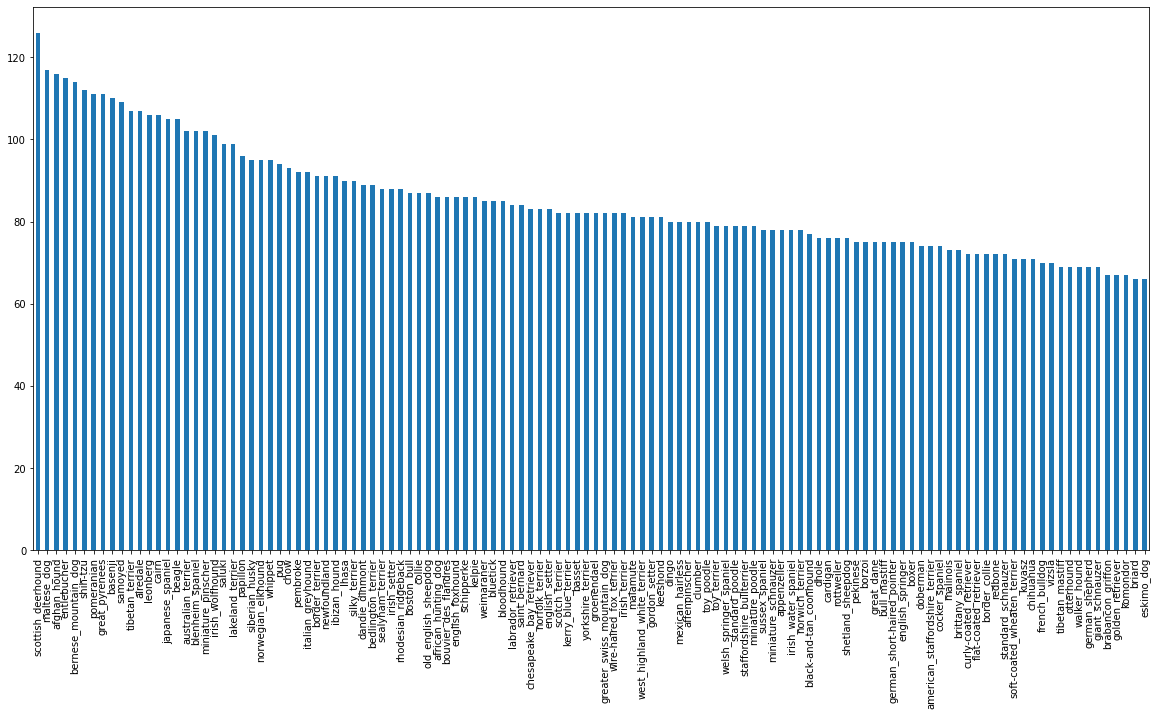

In [4]:
labels_csv.breed.value_counts().plot(kind="bar", figsize=(20,10))

In [5]:
labels_csv.breed.value_counts().median() , labels_csv.breed.value_counts().mean()

(82.0, 85.18333333333334)

In [6]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     455e4253e95f713ee4430e2491085214  scottish_deerhound
freq                                   1                 126

In [7]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


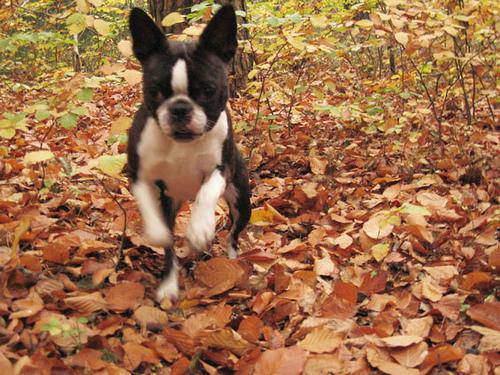

In [8]:
# lets view an image
from IPython.display import Image

Image("/content/drive/My Drive/Colab Notebooks/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")


In [9]:
# Getting images and labels
filenames = ["/content/drive/My Drive/Colab Notebooks/dog-vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

print(filenames[:1])


['/content/drive/My Drive/Colab Notebooks/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg']


In [10]:
import os
if len(os.listdir("/content/drive/My Drive/Colab Notebooks/dog-vision/train/")) == len(filenames):
  print("yes")
else:
  print("No")

yes


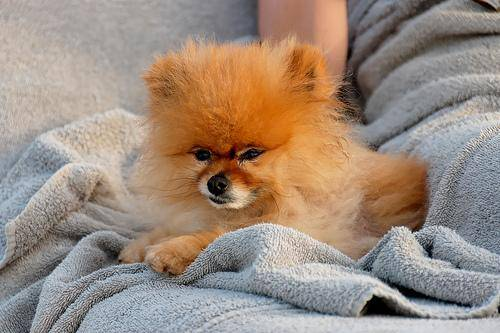

In [11]:
Image(filenames[000])

In [12]:
labels_csv["breed"][8000]

'pomeranian'

In [13]:
import numpy as np

labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels) # same as above
labels


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
len(labels)

10222

In [15]:
len(filenames)

10222

In [16]:
if len(labels) == len(filenames):
  print("matched")
else:
  print("Not matched")

matched


In [17]:
import numpy as np
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [18]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [19]:
print(labels[0])

boston_bull


In [20]:
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
print(labels[:50])

['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever'
 'bedlington_terrier' 'bedlington_terrier' 'borzoi' 'basenji'
 'scottish_deerhound' 'shetland_sheepdog' 'walker_hound' 'maltese_dog'
 'bluetick' 'norfolk_terrier' 'african_hunting_dog'
 'wire-haired_fox_terrier' 'redbone' 'lakeland_terrier' 'boxer' 'doberman'
 'otterhound' 'otterhound' 'bedlington_terrier' 'dingo' 'golden_retriever'
 'standard_schnauzer' 'irish_water_spaniel' 'black-and-tan_coonhound'
 'cairn' 'affenpinscher' 'labrador_retriever' 'ibizan_hound'
 'english_setter' 'walker_hound' 'weimaraner' 'giant_schnauzer'
 'golden_retriever' 'boston_bull' 'groenendael' 'lakeland_terrier'
 'irish_water_spaniel' 'dhole' 'dingo' 'affenpinscher' 'toy_poodle'
 'border_terrier' 'lakeland_terrier' 'tibetan_terrier'
 'norwegian_elkhound']


In [22]:
print(unique_breeds[:50])

['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever']


In [23]:
len(labels), len(unique_breeds)

(10222, 120)

In [24]:
boolean_labels = [label == unique_breeds for label in labels]

print(boolean_labels[:1])

[array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])]


In [25]:
len(boolean_labels)

10222

In [26]:
print(labels[55])
print(np.where(unique_breeds == labels[55]))
print(boolean_labels[55].argmax())
print(boolean_labels[55].astype(int))

giant_schnauzer
(array([48]),)
48
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [27]:
print(boolean_labels[2].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [28]:
filenames[:10]

['/content/drive/My Drive/Colab Notebooks/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

# Creating our own validation set

In [29]:
X = filenames
y = boolean_labels

In [30]:
NUM_IMAGES = 1000 #@param{type:"slider", min:1000, max:10000, step:1000}

In [31]:
from sklearn.model_selection import train_test_split 
X_train, X_valid, y_train, y_valid = train_test_split(X[:NUM_IMAGES],
                                                      y[:NUM_IMAGES],
                                                      test_size=0.2,
                                                      random_state=42)

In [32]:
len(X_train), len(X_valid), len(y_train), len(y_valid)

(800, 200, 800, 200)

In [33]:
X_train[:5], y_train[:5]

(['/content/drive/My Drive/Colab Notebooks/dog-vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/My Drive/Colab Notebooks/dog-vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/My Drive/Colab Notebooks/dog-vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/My Drive/Colab Notebooks/dog-vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/My Drive/Colab Notebooks/dog-vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,


# preprocessing images (Turning images into tensors)

To process images into tensors we are going to write function which does few things :

1. Take an image filepath as input.
2. Use tensors to read image file and store it into variable, image
3. Turn our image (.jpg) into tensors
4. Normalize our image (convert color channels from 0-255 to 0-1)
5. Resize the image to the shape of (224,224)
6. Return the modified image.

Before we do this, lets see what importing an image looks like

In [34]:
# Convert image into numpy array
from matplotlib.pyplot import imread

image = imread(filenames[0])
image.shape

(375, 500, 3)

In [35]:
image.max(), image.min()

(255, 0)

In [36]:
image[:2]

array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]]], dtype=uint8)

In [37]:
# convert image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]]], dtype=uint8)>

preprocessing images (Turning images into tensors)

To process images into tensors we are going to write function which does few things :

1. Take an image filepath as input.
2. Use tensors to read image file and store it into variable, image
3. Turn our image (.jpg) into tensors
4. Normalize our image (convert color channels from 0-255 to 0-1)
5. Resize the image to the shape of (224,224)
6. Return the modified image.


In [38]:
# Define image size
IMG_SIZE = 224

# 1. Take an image filepath as input.
def preprocess_img(image_path, img_size = IMG_SIZE):
  # 2. Use tensors to read image file and store it into variable, image
  image = tf.io.read_file(image_path)
  # 3. Turn our image (.jpg) into tensors
  image = tf.image.decode_jpeg(image, channels=3)
  # 4. Normalize our image (convert color channels from 0-255 to 0-1)
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  # 5. Resize the image to the shape of (224,224)
  image = tf.image.resize(image, size=[img_size, img_size])
  # 6. Return the modified image.
  return image

# Turning our data into batches

why turn our data into batches ?

lets say if you are trying to process more than 10000 images in one go...they might not fit to the memory

so that why we do about 32(this is the batch size) images at a time (we can adjust the batch size manually if needed)

In order to use Tensorflow effectively, we need our data into tensor tuples like this : (image, label). 

In [39]:
def get_image_label(image_path, label):
  '''
  takes the image path and the associated label
  and return thetuple of image and label (image, label)
  '''
  image = preprocess_img(image_path)
  return image, label


In [40]:
get_image_label(X[0], tf.constant(y[0]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.5705322 , 0.33588538, 0.15008473],
         [0.66901225, 0.4601166 , 0.26022965],
         [0.61062384, 0.43763596, 0.21601713],
         ...,
         [0.8182312 , 0.7297958 , 0.26963907],
         [0.72454786, 0.6059109 , 0.2653059 ],
         [0.7494603 , 0.6252918 , 0.32456532]],
 
        [[0.6761415 , 0.4733761 , 0.30642927],
         [0.5672121 , 0.38192675, 0.20349538],
         [0.5883547 , 0.4322571 , 0.2403155 ],
         ...,
         [0.9326942 , 0.8260503 , 0.41093278],
         [0.86072475, 0.74250627, 0.3694122 ],
         [0.76781666, 0.6461604 , 0.29291284]],
 
        [[0.46350825, 0.29595745, 0.1536156 ],
         [0.42554107, 0.27039403, 0.12009468],
         [0.7887875 , 0.6547362 , 0.49015   ],
         ...,
         [0.89372385, 0.7696401 , 0.41811958],
         [0.88609535, 0.7585918 , 0.36495727],
         [0.8243601 , 0.69494826, 0.2930575 ]],
 
        ...,
 
        [[0.7344025 , 0.4716574 

now we have got a way to form data into tuples of (image, label). let's make a function to turn our data of X and y into batches

In [41]:
# Define the batch-size of 32, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):

  # if it is a test dataset, we probabily wont have labels (no labels)
  if test_data:
    print("creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data_batch = data.map(preprocess_img).batch(batch_size)
    return data_batch
  # if it is a validation set, we dont need to shuffle
  elif valid_data:
    print("creating validation data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch
  # it it is a training dataset, we need to do shuffling
  else:
    print("creating training data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)
    # Turn the training data into batches
    data_batch = data.batch(batch_size)
    return data_batch

In [42]:
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_valid, y_valid, valid_data=True)

creating training data batches....
creating validation data batches....


In [43]:
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualizing data batches

In [44]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [45]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

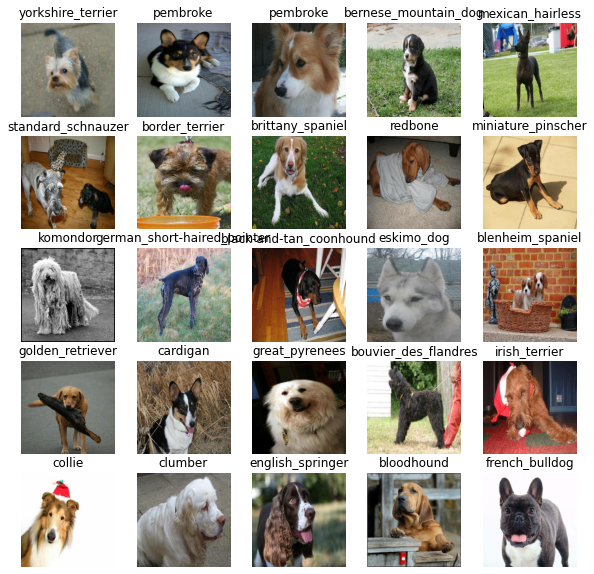

In [46]:
# now lets visualize training batch data
training_images, training_labels = next(train_data.as_numpy_iterator())
show_25_images(training_images, training_labels)

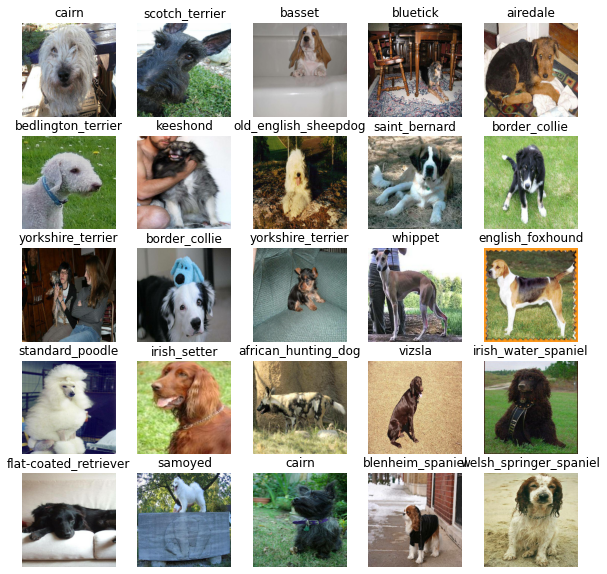

In [47]:
valid_images, valid_labels = next(valid_data.as_numpy_iterator())
show_25_images(valid_images, valid_labels)

# Building a model

before building a model, there are few things we need to define:

1. The input shape to our model (our images shape, in the form of tensors)
2. The ouput shape of our model (image labels, in the form tensors)
3. The URL of the model we want to use from tensorflow hub.

https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [48]:
IMG_SIZE

224

In [49]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] 

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from Tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [50]:
INPUT_SHAPE

[None, 224, 224, 3]

In [51]:
OUTPUT_SHAPE

120

Now we've got our inputs and outputs and model to go, lets put them together into keras deep learning model!!

Knowing this lets create a function which :

1. Takes the input shape, ouput shape and model as an input to parameters.
2. Defines the layers in keras model in sequential fashion(do this first, then this, then that)
3. Compiles the model (says it should be evaluated or improved)
4. Builds the model (tells the model the input shape it'll be getting).
5. returns the model

All of these steps can be found here : https://www.tensorflow.org/guide/keras/overview

In [52]:
# create a function which builds keras model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with : ", model_url)
  # setup the model layers
  model = tf.keras.Sequential(
      [hub.KerasLayer(model_url), # input layer
       tf.keras.layers.Dense(units=output_shape, activation="softmax") # output layer
      ]
  )
  # compile the model 
  model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
               )
  # build the model
  model.build(input_shape)
  return model

In [53]:
model = create_model()
model.summary()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Creating Callbacks

callbacks are helper functions a model can use during training to do such things to save its progress. check its progress or stop training early if a model stops improving

we'll create two callbacks, one with tensorboard which is useful for traking our models progress. and another for early stopping which will prevents our models from training for too long.

## TensorBoard Callback
to setup tensorboard callback we need to do three things :
1. load the tensorboard notebook extension
2. create a tensorboard callback which is able to save logs to our directory and pass it to our model's fit() function.
3. visualize our model training logs with %tensorboard magic function(we'll do this after model training.)

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [54]:
# load the tensorboard notebook extension
%load_ext tensorboard

In [55]:
import datetime
# Create a function to build tensorboard callback
def create_tensorboard_callback():
  # create a log directory for storing tensorboard logs
  logdir = os.path.join("/content/drive/My Drive/Colab Notebooks/dog-vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early stopping callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [56]:
# create a early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

# Training a model (On subset of data)

Our first model is going to train on 1000 images, to makesure everything is working

In [57]:
NUM_EPOCHS = 100 #@param{type:"slider", min:10, max:100, step:10}

In [58]:
# check we have connected to GPU

print("GPU", "Available (YES!!!!)" if tf.config.list_physical_devices("GPU") else "Not available")

GPU Available (YES!!!!)


lets create a function which trains a model

1. create a model using create_model()
2. setup a tensorboard callback create_tensorboard_callback()
3. call the fit() function on our model passing it the training data, validation data and number of epochs (NUM_EPOCHS) to train for and the callbacks we would like to use.
4. return the model.

In [59]:
def train_model():
  # create a model
  model = create_model()

  # create a tensorboard every time when we train a model.
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data 
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # return the fitted model
  return model

In [60]:
# fit the model to the data
model = train_model()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 568s 23s/step - loss: 4.6409 - accuracy: 0.0800 - val_loss: 3.6713 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 6s 259ms/step - loss: 1.6470 - accuracy: 0.7013 - val_loss: 2.3113 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 6s 250ms/step - loss: 0.5625 - accuracy: 0.9375 - val_loss: 1.7605 - val_accuracy: 0.5550
Epoch 4/100
25/25 [==============================] - 6s 254ms/step - loss: 0.2482 - accuracy: 0.9887 - val_loss: 1.5467 - val_accuracy: 0.6650
Epoch 5/100
25/25 [==============================] - 6s 252ms/step - loss: 0.1467 - accuracy: 0.9962 - val_loss: 1.4766 - val_accuracy: 0.6600
Epoch 6/100
25/25 [==============================] - 6s 258ms/step - loss: 0.0991 - accuracy: 1.0000 - val_loss: 1.4225 - val_accuracy: 0.6650
Epoch 7/100
25/25 [============================

## Checking the tensorboard logs


In [61]:
%tensorboard --logdir drive/My\ Drive/Colab\ Notebooks/dog-vision/logs

<IPython.core.display.Javascript object>

# Making and evaluating predictions using a trained data

In [62]:
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [63]:
predictions = model.predict(valid_data, verbose=1)
predictions

7/7 [==============================] - 1s 165ms/step


array([[1.1989237e-03, 3.8188929e-04, 7.3588942e-04, ..., 1.9201262e-04,
        2.3039613e-05, 1.4071919e-03],
       [6.0502589e-03, 2.0992411e-03, 6.0016154e-03, ..., 1.4512944e-03,
        5.5279504e-03, 6.3945929e-04],
       [1.0633604e-05, 1.2269179e-05, 8.0102887e-05, ..., 4.1690091e-05,
        2.6136309e-05, 7.7465760e-05],
       ...,
       [1.0460238e-05, 6.4949745e-05, 1.0845019e-04, ..., 5.6574914e-05,
        5.5825186e-04, 7.2269764e-04],
       [8.2708299e-03, 2.3620456e-04, 1.9258684e-04, ..., 5.2823420e-05,
        1.5679910e-04, 6.7144218e-03],
       [2.3838284e-03, 1.4838357e-05, 1.7779008e-03, ..., 1.2630802e-02,
        8.6290657e-04, 4.5788623e-04]], dtype=float32)

In [64]:
predictions[1]

array([6.05025887e-03, 2.09924113e-03, 6.00161543e-03, 1.59527629e-03,
       5.68564399e-04, 8.58791027e-05, 2.60009640e-03, 4.90898441e-04,
       8.35427840e-04, 1.90370396e-04, 2.40644644e-04, 7.45282960e-05,
       1.51685483e-04, 5.87807845e-05, 1.82579726e-03, 6.70455687e-04,
       7.22714141e-03, 2.29539670e-04, 3.88510562e-05, 1.06519285e-04,
       1.57052896e-03, 7.53192726e-05, 1.46790684e-04, 1.37440453e-03,
       1.32430447e-04, 3.33041709e-04, 3.30649577e-02, 7.85653200e-03,
       5.55203471e-04, 1.39845943e-03, 1.61240925e-04, 1.75590376e-05,
       2.74482474e-04, 2.48377211e-04, 1.56548718e-04, 4.48912411e-04,
       3.76819458e-04, 7.65444990e-03, 5.67062998e-05, 3.25749643e-05,
       5.79660817e-04, 3.22439882e-04, 3.13414115e-04, 7.54727866e-04,
       8.92816286e-04, 4.96427156e-03, 1.45714337e-04, 7.08936350e-05,
       6.15731925e-02, 3.18976585e-04, 5.26087650e-04, 4.40630218e-04,
       3.35112767e-04, 3.05649039e-04, 1.53620902e-03, 9.75188625e-04,
      

In [65]:
np.argmax(predictions[1])

96

In [66]:
np.sum(predictions[1])

1.0000001

In [67]:
unique_breeds[np.argmax(predictions[1])]

'scotch_terrier'

In [68]:
# First prediction
index = 2
print(predictions[index])
print(np.max(predictions[index]))
print(np.sum(predictions[index]))
print(np.argmax(predictions[index]))
print(unique_breeds[np.argmax(predictions[index])])

[1.06336038e-05 1.22691790e-05 8.01028873e-05 2.59362514e-05
 5.96812015e-06 5.65068876e-05 3.67399734e-05 3.36999190e-04
 9.46805298e-01 4.68181883e-04 1.37860607e-05 6.05713176e-05
 6.40046201e-05 4.64152126e-03 2.73127165e-02 1.21755060e-04
 4.62500202e-06 8.07947654e-05 5.57963631e-06 4.07699781e-06
 6.80515541e-06 1.97438058e-04 7.35802605e-05 2.71673798e-05
 1.39920332e-04 2.36895503e-05 7.26933740e-06 2.71716035e-05
 1.52832126e-05 1.37742329e-03 4.54267547e-06 8.69007126e-05
 3.79795179e-04 4.41609373e-05 8.46471175e-06 5.51918019e-05
 3.07502851e-05 4.00524186e-05 2.38431880e-06 1.01916655e-03
 1.92080639e-04 3.90407804e-05 1.88040955e-04 3.51449962e-05
 2.38068205e-05 1.04499180e-04 2.93923695e-05 5.20478970e-05
 4.52951826e-05 3.48452566e-04 1.11469773e-04 2.08043220e-05
 2.91659875e-04 2.88964238e-05 1.96182009e-06 9.08549919e-05
 1.06303196e-03 1.64796738e-03 5.16469709e-06 8.43471025e-06
 4.09721775e-04 4.74662957e-04 3.14417339e-05 1.15762905e-05
 3.56649361e-05 5.647647

In [69]:
unique_breeds[8]

'basset'

In [70]:
# Turn pridiction probabilities into their respective label
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[2])
pred_label

'basset'

In [71]:
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [72]:
# create a function to unbatch the data
def unbatchify(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

In [73]:
# unbatchify the validation batches
val_images, val_labels = unbatchify(valid_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [74]:
def plot_pred(prediction_probabilities, labels, images, n=1):

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else :
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

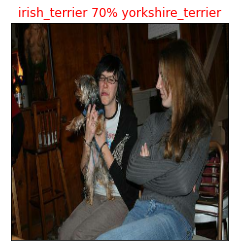

In [75]:
plot_pred(prediction_probabilities=predictions,
          labels = val_labels,
          images = val_images, n=10)

In [77]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)
  
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  top_10_pred_values = pred_prob[top_10_pred_indexes]

  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), top_10_pred_values, color = "grey")

  plt.xticks(np.arange(len(top_10_pred_labels)), labels = top_10_pred_labels, rotation = "vertical")

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

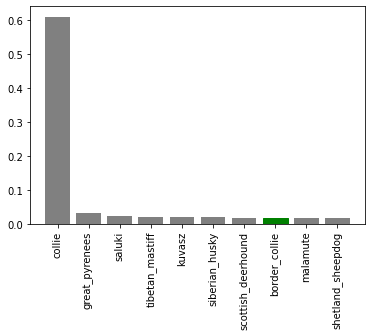

In [78]:
plot_pred_conf(prediction_probabilities=predictions,
               labels = val_labels,n = 9)

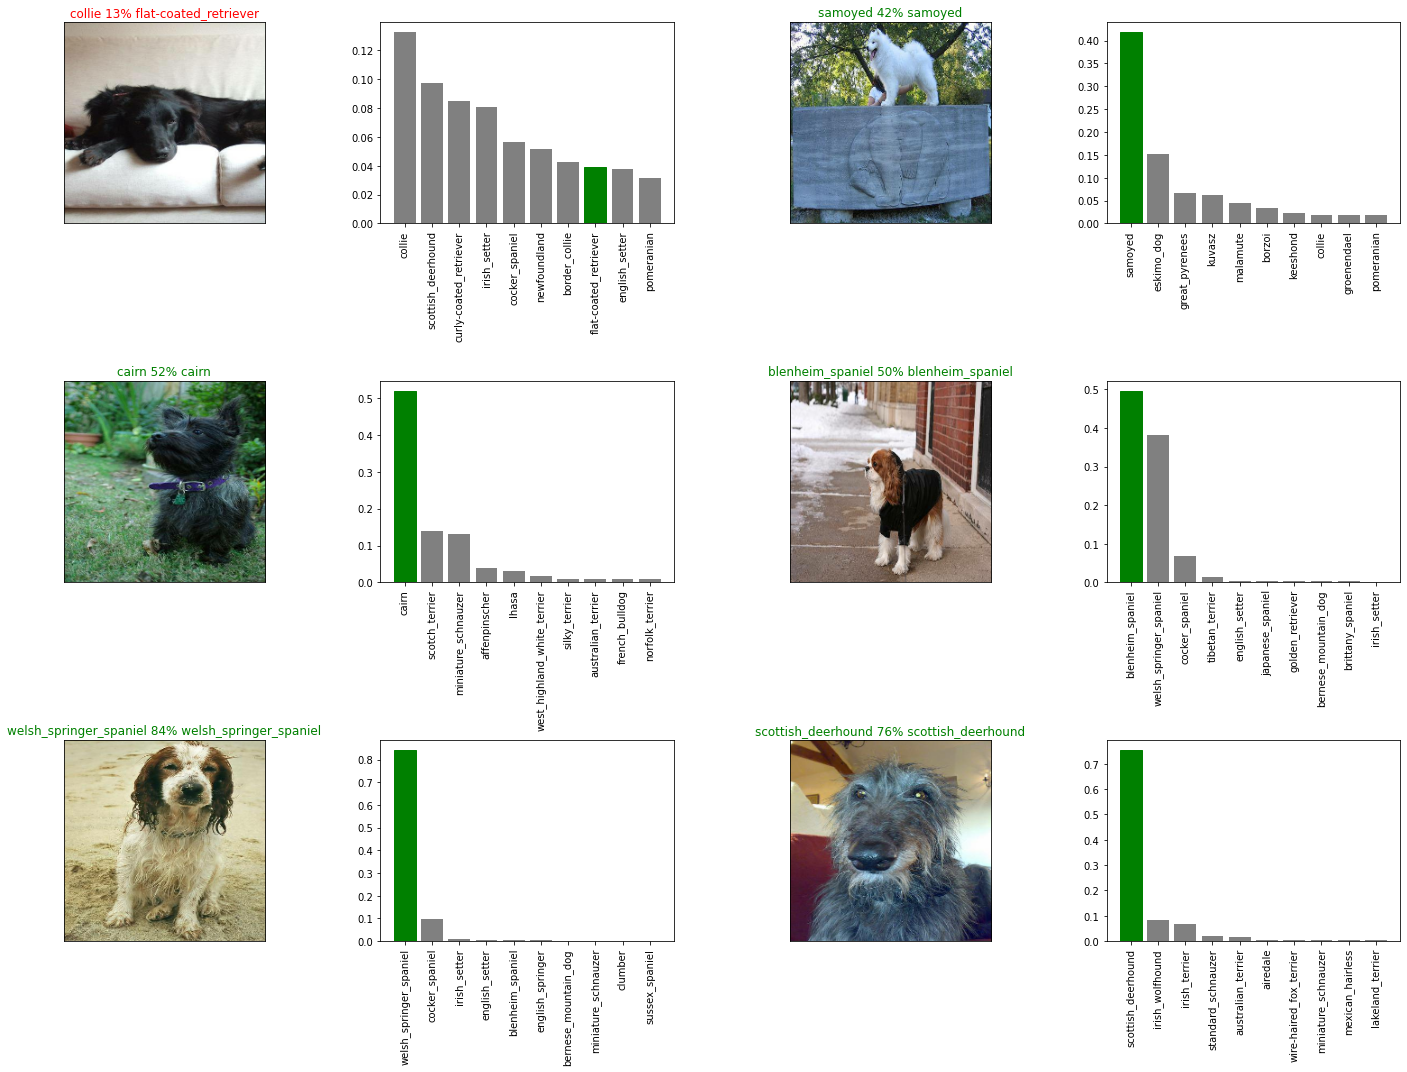

In [79]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# Saving the model and loading it

In [80]:
def save_model(model, suffix=None):

  model_dir = os.path.join("drive/My Drive/Colab Notebooks/dog-vision/models",
               datetime.datetime.now().strftime("%Y%m%d-%H%m%s"))
  model_path = model_dir + "-" + suffix + ".h5"
  print(f"saving model to : {model_path}...")
  model.save(model_path)
  return model_path

In [81]:
def load_model(model_path):

  print(f"loading model from the {model_path}")
  model = tf.keras.models.load_model(model_path,
                             custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [82]:
save_model(model, suffix="1000-images-mobilnetv2-Adam")

saving model to : drive/My Drive/Colab Notebooks/dog-vision/models/20200727-08071595837130-1000-images-mobilnetv2-Adam.h5...


'drive/My Drive/Colab Notebooks/dog-vision/models/20200727-08071595837130-1000-images-mobilnetv2-Adam.h5'

In [83]:
loaded_1000_images_model = load_model("drive/My Drive/Colab Notebooks/dog-vision/models/20200502-11051588420452-1000-images-mobilnetv2-Adam.h5")

loading model from the drive/My Drive/Colab Notebooks/dog-vision/models/20200502-11051588420452-1000-images-mobilnetv2-Adam.h5


In [84]:
model.evaluate(valid_data)

7/7 [==============================] - 1s 145ms/step - loss: 1.3915 - accuracy: 0.6600


[1.3914510011672974, 0.6600000262260437]

In [85]:
loaded_1000_images_model.evaluate(valid_data)

7/7 [==============================] - 1s 142ms/step - loss: 1.3138 - accuracy: 0.6750


[1.3137952089309692, 0.675000011920929]

# Training a big dog model 🐶 (on the full data)

In [86]:
full_data = create_data_batches(X, y)

creating training data batches....


In [87]:
full_model = create_model()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [88]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [89]:
full_model.fit(x = full_data, epochs=NUM_EPOCHS, callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 5917s 18s/step - loss: 1.3602 - accuracy: 0.6663
Epoch 2/100
320/320 [==============================] - 67s 209ms/step - loss: 0.4002 - accuracy: 0.8821
Epoch 3/100
320/320 [==============================] - 69s 216ms/step - loss: 0.2362 - accuracy: 0.9360
Epoch 4/100
320/320 [==============================] - 73s 229ms/step - loss: 0.1535 - accuracy: 0.9627
Epoch 5/100
320/320 [==============================] - 73s 228ms/step - loss: 0.1071 - accuracy: 0.9781
Epoch 6/100
320/320 [==============================] - 74s 231ms/step - loss: 0.0764 - accuracy: 0.9871
Epoch 7/100
320/320 [==============================] - 72s 226ms/step - loss: 0.0587 - accuracy: 0.9923
Epoch 8/100
320/320 [==============================] - 72s 226ms/step - loss: 0.0452 - accuracy: 0.9950
Epoch 9/100
320/320 [==============================] - 72s 225ms/step - loss: 0.0385 - accuracy: 0.9963
Epoch 10/100
320/320 [==============================] - 74s 231m

In [90]:
save_model(full_model, suffix = "full-images-set-mobilnetv2-Adam")

saving model to : drive/My Drive/Colab Notebooks/dog-vision/models/20200727-10071595844286-full-images-set-mobilnetv2-Adam.h5...


'drive/My Drive/Colab Notebooks/dog-vision/models/20200727-10071595844286-full-images-set-mobilnetv2-Adam.h5'

In [91]:
# Load the full model
loaded_full_model = load_model("drive/My Drive/Colab Notebooks/dog-vision/models/20200502-17051588441560-full-images-set-mobilnetv2-Adam.h5")

loading model from the drive/My Drive/Colab Notebooks/dog-vision/models/20200502-17051588441560-full-images-set-mobilnetv2-Adam.h5


In [92]:
# load the test image files
import os
test_path = "drive/My Drive/Colab Notebooks/dog-vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Colab Notebooks/dog-vision/test/e8e6e731b4afb84faf9c022a67935867.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/test/ecd186a42dd0ec3f78aa3d4fa56b8ea0.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/test/e85b19a69be67eaef9fe58b7e689ee81.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/test/e9d585ce5dc29b4e9aa6a7332ddfa983.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/test/ed3b2e79859710376b7a91379234b1ec.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/test/f3482b871bff6a7d6907f10eeac75aea.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/test/efaa7438a6c3bdf92f90539a1fff55fe.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/test/e9d0bcd1ca3f651f6693de92d63bce5c.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/test/f3ad6585619f3489fe3c01b4e305f70b.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/test/f232ed4d2958c9b13ec8922933a852e4.jpg']

In [93]:
len(test_filenames)

10357

In [94]:
test_data = create_data_batches(test_filenames, test_data=True)

creating test data batches...


In [95]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [96]:
test_predictions = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 6583s 20s/step


In [97]:
# Save predictions (NumPy array) to csv file (for access later)
import numpy as np
np.savetxt("drive/My Drive/Colab Notebooks/dog-vision/preds_array.csv", test_predictions, delimiter=",")

In [98]:
test_predictions

array([[1.5573614e-11, 5.0685812e-13, 6.1390693e-13, ..., 6.6218425e-10,
        9.4489294e-10, 2.7593641e-09],
       [8.1351753e-10, 3.1039435e-10, 2.0694523e-13, ..., 1.2123859e-11,
        3.9092996e-09, 9.1892327e-11],
       [1.3481112e-07, 1.9701441e-05, 1.8082256e-06, ..., 7.1823123e-08,
        6.3075609e-06, 4.7523875e-02],
       ...,
       [7.7469066e-11, 8.2035233e-11, 8.0834468e-14, ..., 2.1169371e-15,
        3.3658102e-13, 6.7420445e-13],
       [3.8484656e-13, 6.3999630e-07, 2.2807114e-12, ..., 4.1338899e-10,
        3.5678727e-10, 1.7975215e-11],
       [1.1283858e-09, 2.3579808e-11, 2.6558799e-12, ..., 3.1692224e-08,
        8.7310307e-12, 3.0329075e-12]], dtype=float32)

In [99]:
test_predictions.shape

(10357, 120)

In [100]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [101]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [102]:
preds_df.head()

id  ... yorkshire_terrier
0  e8e6e731b4afb84faf9c022a67935867  ...               NaN
1  ecd186a42dd0ec3f78aa3d4fa56b8ea0  ...               NaN
2  e85b19a69be67eaef9fe58b7e689ee81  ...               NaN
3  e9d585ce5dc29b4e9aa6a7332ddfa983  ...               NaN
4  ed3b2e79859710376b7a91379234b1ec  ...               NaN

[5 rows x 121 columns]

In [103]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  e8e6e731b4afb84faf9c022a67935867  ...       2.75936e-09
1  ecd186a42dd0ec3f78aa3d4fa56b8ea0  ...       9.18923e-11
2  e85b19a69be67eaef9fe58b7e689ee81  ...         0.0475239
3  e9d585ce5dc29b4e9aa6a7332ddfa983  ...       2.28563e-06
4  ed3b2e79859710376b7a91379234b1ec  ...       2.00243e-11

[5 rows x 121 columns]

In [104]:
# Save our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv("drive/My Drive/Colab Notebooks/dog-vision/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

# Custom predictions

In [105]:
import os
custom_path = "drive/My Drive/Colab Notebooks/dog-vision/dog-images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [106]:
custom_image_paths

['drive/My Drive/Colab Notebooks/dog-vision/dog-images/IMG-20200502-WA0017.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/dog-images/IMG-20200503-WA0005.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/dog-images/IMG-20200503-WA0006.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/dog-images/20200503_175856.jpg',
 'drive/My Drive/Colab Notebooks/dog-vision/dog-images/20200503_180835.jpg']

In [107]:
# Turn custom images into batch datasets 
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [108]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [109]:
custom_preds.shape

(5, 120)

In [110]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['golden_retriever', 'dhole', 'norwich_terrier', 'golden_retriever', 'samoyed']

In [111]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

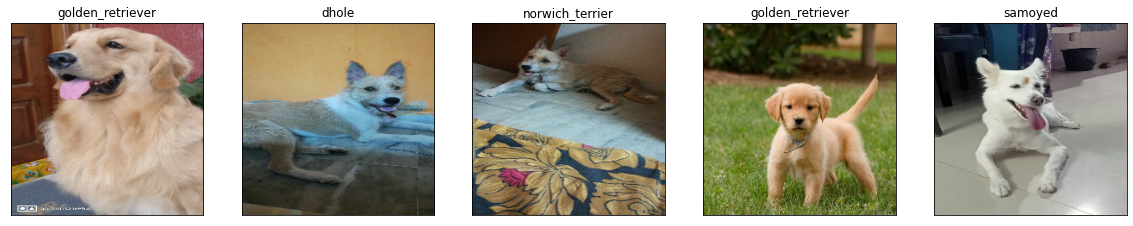

In [112]:
# Check custom image predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
for i, image in enumerate(custom_images):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)